In [76]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
plotting.setup_mpl()
ff1.Cache.enable_cache('../cache/')
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
pio.templates.default = "plotly_dark"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.max_rows = 75
pd.options.display.max_columns = 99

In [46]:
year = 2022
gp_round = 5
ses = 'R'

In [47]:
driver_1 = 'VER'
driver_2 = 'HAM'

In [48]:
events_list = ff1.get_event_schedule(2022)[2:]

session = ff1.get_session(year, gp_round, ses)
session.load(weather=True, telemetry=True)

core           INFO 	Loading data for Miami Grand Prix - Race [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '55', '11', '63', '44', '77', '31', '23', '18', '14', '22', '3', '6', '47', '20', '5', '10', '4', '24']


In [49]:
events_list

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport
2,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022,2022-03-20 20:00:00,Bahrain Grand Prix,conventional,Practice 1,2022-03-18 15:00:00,Practice 2,2022-03-18 18:00:00,Practice 3,2022-03-19 15:00:00,Qualifying,2022-03-19 18:00:00,Race,2022-03-20 18:00:00,True
3,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022,2022-03-27 22:00:00,Saudi Arabian Grand Prix,conventional,Practice 1,2022-03-25 17:00:00,Practice 2,2022-03-25 20:00:00,Practice 3,2022-03-26 17:00:00,Qualifying,2022-03-26 20:00:00,Race,2022-03-27 20:00:00,True
4,3,Australia,Melbourne,FORMULA 1 HEINEKEN AUSTRALIAN GRAND PRIX 2022,2022-04-10 17:00:00,Australian Grand Prix,conventional,Practice 1,2022-04-08 13:00:00,Practice 2,2022-04-08 16:00:00,Practice 3,2022-04-09 13:00:00,Qualifying,2022-04-09 16:00:00,Race,2022-04-10 15:00:00,True
5,4,Italy,Imola,FORMULA 1 ROLEX GRAN PREMIO DEL MADE IN ITALY E DELL'EMILIA-ROMAGNA 2022,2022-04-24 17:00:00,Emilia Romagna Grand Prix,sprint,Practice 1,2022-04-22 13:30:00,Qualifying,2022-04-22 17:00:00,Practice 2,2022-04-23 12:30:00,Sprint,2022-04-23 16:30:00,Race,2022-04-24 15:00:00,True
6,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2022,2022-05-08 17:30:00,Miami Grand Prix,conventional,Practice 1,2022-05-06 14:30:00,Practice 2,2022-05-06 17:30:00,Practice 3,2022-05-07 13:00:00,Qualifying,2022-05-07 16:00:00,Race,2022-05-08 15:30:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,18,Japan,Suzuka,FORMULA 1 JAPANESE GRAND PRIX 2022,2022-10-09 16:00:00,Japanese Grand Prix,conventional,Practice 1,2022-10-07 13:00:00,Practice 2,2022-10-07 16:00:00,Practice 3,2022-10-08 13:00:00,Qualifying,2022-10-08 16:00:00,Race,2022-10-09 14:00:00,True
20,19,United States,Austin,FORMULA 1 ARAMCO UNITED STATES GRAND PRIX 2022,2022-10-23 16:00:00,United States Grand Prix,conventional,Practice 1,2022-10-21 14:00:00,Practice 2,2022-10-21 17:00:00,Practice 3,2022-10-22 14:00:00,Qualifying,2022-10-22 17:00:00,Race,2022-10-23 14:00:00,True
21,20,Mexico,Mexico City,FORMULA 1 GRAN PREMIO DE LA CIUDAD DE MÉXICO 2022,2022-10-30 16:00:00,Mexico City Grand Prix,conventional,Practice 1,2022-10-28 13:00:00,Practice 2,2022-10-28 16:00:00,Practice 3,2022-10-29 12:00:00,Qualifying,2022-10-29 15:00:00,Race,2022-10-30 14:00:00,True
22,21,Brazil,São Paulo,FORMULA 1 HEINEKEN GRANDE PRÊMIO DE SÃO PAULO 2022,2022-11-13 17:00:00,São Paulo Grand Prix,sprint,Practice 1,2022-11-11 12:30:00,Qualifying,2022-11-11 16:00:00,Practice 2,2022-11-12 12:30:00,Sprint,2022-11-12 16:30:00,Race,2022-11-13 15:00:00,True


In [50]:
session.results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,3.0,NaT,NaT,NaT,0 days 01:34:24.258000,Finished,26.0
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,2.0,1.0,NaT,NaT,NaT,0 days 01:34:28.044000,Finished,18.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,3.0,2.0,NaT,NaT,NaT,0 days 01:34:32.487000,Finished,15.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,4.0,4.0,NaT,NaT,NaT,0 days 01:34:34.896000,Finished,12.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,5.0,12.0,NaT,NaT,NaT,0 days 01:34:42.840000,Finished,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,20,K MAGNUSSEN,MAG,Haas F1 Team,b6babd,Kevin,Magnussen,Kevin Magnussen,16.0,16.0,NaT,NaT,NaT,NaT,Front wing,0.0
5,5,S VETTEL,VET,Aston Martin,2d826d,Sebastian,Vettel,Sebastian Vettel,17.0,0.0,NaT,NaT,NaT,NaT,Collision,0.0
10,10,P GASLY,GAS,AlphaTauri,4e7c9b,Pierre,Gasly,Pierre Gasly,18.0,7.0,NaT,NaT,NaT,NaT,Suspension,0.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,19.0,8.0,NaT,NaT,NaT,NaT,Collision,0.0


In [51]:
fastest_lap = session.laps.pick_fastest()
tel = fastest_lap.telemetry
tel

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-05-08 21:01:33.852,0 days 02:30:33.844000,,NaN,0 days 00:00:00,11084,279,7,100,False,0,interpolation,0.026871,0.000005,OnTrack,1839,127,249
3,2022-05-08 21:01:33.883,0 days 02:30:33.875000,,NaN,0 days 00:00:00.031000,11112,280,7,100,False,0,pos,2.444936,0.000457,OnTrack,1860,115,250
4,2022-05-08 21:01:34.022,0 days 02:30:34.014000,,NaN,0 days 00:00:00.170000,11168,281,7,100,False,0,car,13.330556,0.002493,OnTrack,1951,56,249
5,2022-05-08 21:01:34.183,0 days 02:30:34.175000,,NaN,0 days 00:00:00.331000,11212,282,7,100,False,0,pos,26.027523,0.004867,OnTrack,2059,-11,250
6,2022-05-08 21:01:34.363,0 days 02:30:34.355000,,NaN,0 days 00:00:00.511000,11257,283,7,100,False,0,pos,40.317748,0.007539,OnTrack,2180,-87,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,2022-05-08 21:03:04.823,0 days 02:32:04.815000,,NaN,0 days 00:01:30.971000,11040,277,7,100,False,0,pos,5294.664440,0.990072,OnTrack,1610,267,249
669,2022-05-08 21:03:04.862,0 days 02:32:04.854000,,NaN,0 days 00:01:31.010000,11063,278,7,100,False,0,car,5297.679167,0.990636,OnTrack,1636,251,249
670,2022-05-08 21:03:05.142,0 days 02:32:05.134000,,NaN,0 days 00:01:31.290000,11062,279,7,100,False,0,car,5319.379167,0.994693,OnTrack,1822,137,249
671,2022-05-08 21:03:05.183,0 days 02:32:05.175000,,NaN,0 days 00:01:31.331000,11132,280,7,100,False,0,pos,5322.577110,0.995291,OnTrack,1850,121,250


In [52]:
session_weather = session.weather_data
session_weather

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:30.789000,31.7,49.0,1010.0,True,42.8,322,3.5
1,0 days 00:01:30.783000,31.4,49.0,1010.0,True,42.8,322,3.5
2,0 days 00:02:30.788000,31.3,49.0,1010.0,True,42.8,322,3.5
3,0 days 00:03:30.789000,31.2,49.0,1010.0,True,42.8,322,3.5
4,0 days 00:04:30.788000,30.8,53.0,1010.0,True,36.2,312,2.7
...,...,...,...,...,...,...,...,...
157,0 days 02:37:31.353000,29.7,67.0,1008.9,False,40.0,69,1.7
158,0 days 02:38:31.368000,29.7,67.0,1008.9,False,40.6,119,2.5
159,0 days 02:39:31.380000,29.8,67.0,1008.7,False,41.3,146,2.4
160,0 days 02:40:31.396000,29.9,66.0,1008.7,False,41.0,142,1.7


In [53]:
# Function to format timedelta Series as string if necessary
def format_time(timedelta_series):
    t_list_str = []
    for i in timedelta_series:
        i = str(i)
        t_list_str.append(i[10:-3])
        
    return t_list_str

In [54]:
fastest_driver_1 = session.laps.pick_driver(driver_1).pick_fastest()
fastest_driver_2 = session.laps.pick_driver(driver_2).pick_fastest()

In [55]:
car_data_1 = fastest_driver_1.get_car_data().add_distance()
car_data_1['Distance'] = round(car_data_1['Distance'])
car_data_2 = fastest_driver_2.get_car_data().add_distance()
car_data_2['Distance'] = round(car_data_2['Distance'])
# t_list_lec = format_time(t_lec)
# t_list_msc = format_time(t_msc)

In [56]:
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)
plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}"

In [57]:
ref_tel

,Date,SessionTime,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,Distance
0,2022-05-08 21:01:33.852,0 days 02:30:33.844000,11112,280,7,100,False,0,interpolation,0 days 00:00:00,0.000000
1,2022-05-08 21:01:34.022,0 days 02:30:34.014000,11168,281,7,100,False,0,car,0 days 00:00:00.170000,13.269444
2,2022-05-08 21:01:34.382,0 days 02:30:34.374000,11302,285,7,100,False,0,car,0 days 00:00:00.530000,41.769444
3,2022-05-08 21:01:34.822,0 days 02:30:34.814000,11310,288,7,100,False,0,car,0 days 00:00:00.970000,76.969444
4,2022-05-08 21:01:35.182,0 days 02:30:35.174000,11357,288,7,100,False,0,car,0 days 00:00:01.330000,105.769444
...,...,...,...,...,...,...,...,...,...,...,...
330,2022-05-08 21:03:04.422,0 days 02:32:04.414000,10896,272,7,100,False,0,car,0 days 00:01:30.570000,5263.773611
331,2022-05-08 21:03:04.662,0 days 02:32:04.654000,10994,276,7,100,False,0,car,0 days 00:01:30.810000,5282.173611
332,2022-05-08 21:03:04.862,0 days 02:32:04.854000,11063,278,7,100,False,0,car,0 days 00:01:31.010000,5297.618056
333,2022-05-08 21:03:05.142,0 days 02:32:05.134000,11062,279,7,100,False,0,car,0 days 00:01:31.290000,5319.318056


In [58]:
hovertemplate_speed = 'Speed: %{y} km/h'+'<br>Distance: %{x} meters'
hovertemplate_gear = 'Gear: %{y}'+'<br>Distance: %{x} meters'
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
fig.add_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
fig.add_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8, line_width=1), secondary_y=True)

fig.update_yaxes(title_text="Speed (km/h)", secondary_y=False)
fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", secondary_y=True)
fig.update_layout(width=1200, height=600, title_text=plot_title, xaxis_title='Distance (m)', title_x=0.5)
fig.show()

In [59]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=('Speed', 'Gear', 'Delta Time'), vertical_spacing=0.1)

fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)
fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)

fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['nGear'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)
fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['nGear'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)

fig.append_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', mode='lines', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8), 3, 1)

fig.update_yaxes(title_text="Speed (km/h)", row=1, col=1)
fig.update_yaxes(title_text="Gear", row=2, col=1)
fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", row=3, col=1)
fig.update_xaxes(title_text="Distance (m)", row=3, col=1)

fig.update_layout(width=1200, height=1200, title_text=plot_title, title_x=0.1)
fig.show()

In [60]:
# Returns only laps quicker than 107% of the quickest lap of the session, removing outlaps and inlaps.
session.laps.pick_quicklaps()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
1,0 days 01:05:27.943000,1,0 days 00:01:34.542000,2,1,NaT,NaT,0 days 00:00:32.267000,0 days 00:00:35.970000,0 days 00:00:26.305000,0 days 01:04:25.668000,0 days 01:05:01.638000,0 days 01:05:27.943000,212.0,186.0,271.0,301.0,False,MEDIUM,2.0,True,0 days 01:03:53.401000,Red Bull Racing,VER,1,True,2022-05-08 19:34:53.409
2,0 days 01:07:02.493000,1,0 days 00:01:34.550000,3,1,NaT,NaT,0 days 00:00:32.182000,0 days 00:00:36.062000,0 days 00:00:26.306000,0 days 01:06:00.125000,0 days 01:06:36.187000,0 days 01:07:02.493000,211.0,184.0,275.0,307.0,False,MEDIUM,3.0,True,0 days 01:05:27.943000,Red Bull Racing,VER,1,True,2022-05-08 19:36:27.951
3,0 days 01:08:36.780000,1,0 days 00:01:34.287000,4,1,NaT,NaT,0 days 00:00:32.092000,0 days 00:00:35.968000,0 days 00:00:26.227000,0 days 01:07:34.585000,0 days 01:08:10.553000,0 days 01:08:36.780000,NaN,183.0,274.0,309.0,False,MEDIUM,4.0,True,0 days 01:07:02.493000,Red Bull Racing,VER,1,True,2022-05-08 19:38:02.501
4,0 days 01:10:11.100000,1,0 days 00:01:34.320000,5,1,NaT,NaT,0 days 00:00:32.028000,0 days 00:00:35.942000,0 days 00:00:26.350000,0 days 01:09:08.808000,0 days 01:09:44.750000,0 days 01:10:11.100000,212.0,183.0,274.0,309.0,False,MEDIUM,5.0,True,0 days 01:08:36.780000,Red Bull Racing,VER,1,True,2022-05-08 19:39:36.788
5,0 days 01:11:45.327000,1,0 days 00:01:34.227000,6,1,NaT,NaT,0 days 00:00:31.891000,0 days 00:00:35.971000,0 days 00:00:26.365000,0 days 01:10:42.991000,0 days 01:11:18.962000,0 days 01:11:45.327000,NaN,184.0,274.0,311.0,False,MEDIUM,6.0,True,0 days 01:10:11.100000,Red Bull Racing,VER,1,True,2022-05-08 19:41:11.108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0 days 02:04:45.333000,4,0 days 00:01:34.190000,39,2,NaT,NaT,0 days 00:00:31.813000,0 days 00:00:36.293000,0 days 00:00:26.084000,0 days 02:03:42.956000,0 days 02:04:19.249000,0 days 02:04:45.333000,210.0,185.0,281.0,319.0,False,HARD,21.0,True,0 days 02:03:11.143000,McLaren,NOR,1,True,2022-05-08 20:34:11.151
1051,0 days 01:05:38.876000,24,0 days 00:01:37.487000,2,1,NaT,NaT,0 days 00:00:33.346000,0 days 00:00:37.351000,0 days 00:00:26.790000,0 days 01:04:34.735000,0 days 01:05:12.086000,0 days 01:05:38.876000,211.0,185.0,276.0,279.0,False,MEDIUM,2.0,True,0 days 01:04:01.389000,Alfa Romeo,ZHO,1,True,2022-05-08 19:35:01.397
1052,0 days 01:07:15.603000,24,0 days 00:01:36.727000,3,1,NaT,NaT,0 days 00:00:33.214000,0 days 00:00:36.851000,0 days 00:00:26.662000,0 days 01:06:12.090000,0 days 01:06:48.941000,0 days 01:07:15.603000,212.0,183.0,276.0,292.0,False,MEDIUM,3.0,True,0 days 01:05:38.876000,Alfa Romeo,ZHO,1,True,2022-05-08 19:36:38.884
1053,0 days 01:08:51.334000,24,0 days 00:01:35.731000,4,1,NaT,NaT,0 days 00:00:32.737000,0 days 00:00:36.503000,0 days 00:00:26.491000,0 days 01:07:48.340000,0 days 01:08:24.843000,0 days 01:08:51.334000,207.0,185.0,278.0,287.0,True,MEDIUM,4.0,True,0 days 01:07:15.603000,Alfa Romeo,ZHO,1,True,2022-05-08 19:38:15.611


In [61]:
lap_1 = fastest_driver_1.telemetry
lap_2 = fastest_driver_2.telemetry

In [62]:
start_line_dict = {1: [120, 1280, '^'],
                   2: [-1341, 2800, '<'],
                   3: [-1228, 100, '<'],
                   4: [-1533, -650, '<'],
                   5: [2633, 128, '>'],
                   6: [25, -469, '<'],
                   7: [-8065, -6549, '^']
}

In [63]:
colormap_speed = mpl.cm.RdYlGn
colormap_gear = mpl.cm.get_cmap('RdYlGn', 8)
points = np.array([lap_1['X'], lap_1['Y']]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
start_x = points[0][0][0]
start_y = points[0][0][1]
direction_x = start_line_dict[gp_round][0]
direction_y = start_line_dict[gp_round][1]
direction_marker = start_line_dict[gp_round][2]
px = 1/plt.rcParams['figure.dpi']

In [64]:
start_x

1839

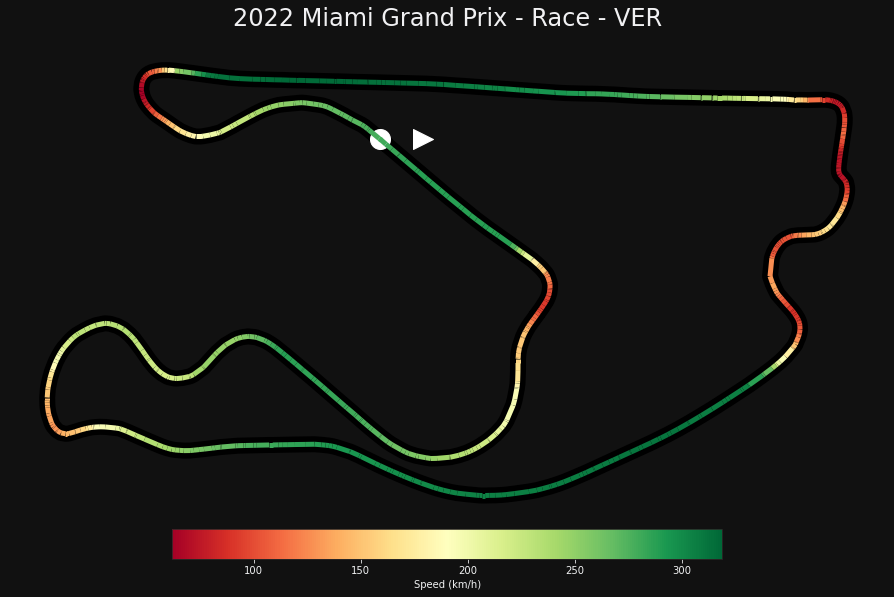

In [65]:
# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(1100*px, 600*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(lap_1['Speed'].min(), lap_1['Speed'].max())
lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(lap_1['Speed'])

# Merge all line segments together
line = ax.add_collection(lc)

# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=lap_1['Speed'].min(), vmax=lap_1['Speed'].max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label='Speed (km/h)')

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

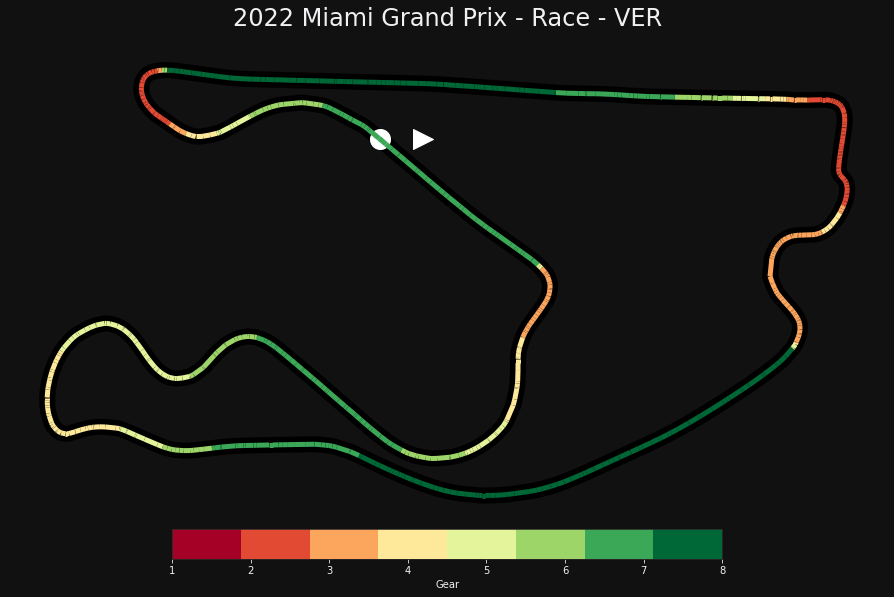

In [66]:
# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(1100*px, 600*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

# Create a norm to map from data points to colors
norm = plt.Normalize(1, colormap_gear.N+1)
lc = LineCollection(segments, cmap=colormap_gear, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(lap_1['nGear'].to_numpy().astype(float))

# Merge all line segments together
line = ax.add_collection(lc)

# Create a color bar as a legend
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=1, vmax=8)
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_gear, orientation="horizontal", label='Gear')

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

In [67]:
def delta_bounds(vmin, vmax):
    if abs(vmin) < abs(vmax):
        vmin = -(vmax)
    else:
        vmax = -(vmin)
    return vmin, vmax

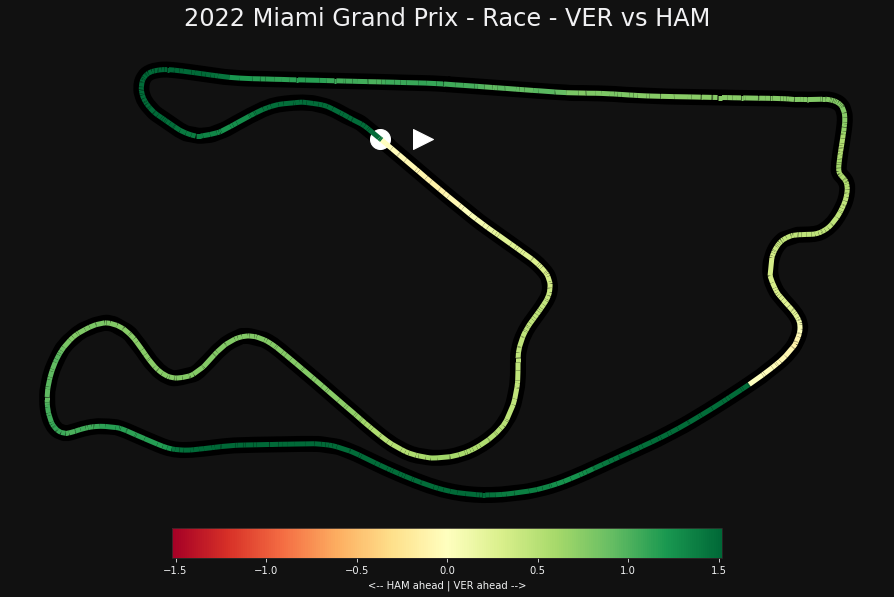

In [68]:
# Determine boundaries for the colorbar
vmin, vmax = delta_bounds(delta_time.min(), delta_time.max())

# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(1100*px, 600*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_2['X'], lap_2['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(vmin, vmax)
lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(delta_time)

# Merge all line segments together
line = ax.add_collection(lc)

# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label=f"<-- {driver_2} ahead | {driver_1} ahead -->")

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

In [69]:
race = session.laps
race.info()

<class 'fastf1.core.Laps'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                1056 non-null   timedelta64[ns]
 1   DriverNumber        1056 non-null   object         
 2   LapTime             1001 non-null   timedelta64[ns]
 3   LapNumber           1056 non-null   int64          
 4   Stint               1056 non-null   int64          
 5   PitOutTime          45 non-null     timedelta64[ns]
 6   PitInTime           29 non-null     timedelta64[ns]
 7   Sector1Time         1028 non-null   timedelta64[ns]
 8   Sector2Time         1056 non-null   timedelta64[ns]
 9   Sector3Time         1055 non-null   timedelta64[ns]
 10  Sector1SessionTime  1028 non-null   timedelta64[ns]
 11  Sector2SessionTime  1056 non-null   timedelta64[ns]
 12  Sector3SessionTime  1055 non-null   timedelta64[ns]
 13  SpeedI1             875 non-null    float64 

In [78]:
race = race.sort_values('Time').reset_index(drop=True)
race.head(15)

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:03:52.571000,16,NaT,1,1,0 days 00:23:43.508000,NaT,NaT,0 days 00:00:36.055000,0 days 00:00:26.572000,NaT,0 days 01:03:26.054000,0 days 01:03:52.632000,210.0,186.0,269.0,308.0,False,MEDIUM,1.0,True,0 days 01:02:16.435000,Ferrari,LEC,1,False,2022-05-08 19:33:16.443
1,0 days 01:03:53.401000,1,NaT,1,1,0 days 00:23:51.168000,NaT,NaT,0 days 00:00:35.848000,0 days 00:00:26.431000,NaT,0 days 01:03:27.035000,0 days 01:03:53.493000,209.0,185.0,268.0,304.0,False,MEDIUM,1.0,True,0 days 01:02:16.435000,Red Bull Racing,VER,1,False,2022-05-08 19:33:16.443
2,0 days 01:03:54.269000,55,NaT,1,1,0 days 00:25:08.834000,NaT,NaT,0 days 00:00:36.162000,0 days 00:00:26.429000,NaT,0 days 01:03:27.879000,0 days 01:03:54.359000,214.0,186.0,272.0,308.0,False,MEDIUM,1.0,True,0 days 01:02:16.435000,Ferrari,SAI,1,False,2022-05-08 19:33:16.443
3,0 days 01:03:54.930000,11,NaT,1,1,0 days 00:22:21.429000,NaT,NaT,0 days 00:00:36.308000,0 days 00:00:26.397000,NaT,0 days 01:03:28.563000,0 days 01:03:54.988000,208.0,185.0,272.0,296.0,False,MEDIUM,1.0,True,0 days 01:02:16.435000,Red Bull Racing,PER,1,False,2022-05-08 19:33:16.443
4,0 days 01:03:55.855000,77,NaT,1,1,0 days 00:23:02.283000,NaT,NaT,0 days 00:00:36.545000,0 days 00:00:26.522000,NaT,0 days 01:03:29.454000,0 days 01:03:55.949000,210.0,186.0,272.0,305.0,False,MEDIUM,1.0,True,0 days 01:02:16.435000,Alfa Romeo,BOT,1,False,2022-05-08 19:33:16.443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,0 days 01:04:00.006000,3,NaT,1,1,0 days 00:22:23.286000,NaT,NaT,0 days 00:00:37.260000,0 days 00:00:27.075000,NaT,0 days 01:03:32.953000,0 days 01:04:00.062000,205.0,183.0,265.0,295.0,False,MEDIUM,1.0,True,0 days 01:02:16.435000,McLaren,RIC,1,False,2022-05-08 19:33:16.443
11,0 days 01:04:00.265000,47,NaT,1,1,0 days 00:23:52.421000,NaT,NaT,0 days 00:00:37.421000,0 days 00:00:26.766000,NaT,0 days 01:03:33.558000,0 days 01:04:00.338000,204.0,185.0,275.0,298.0,False,MEDIUM,1.0,True,0 days 01:02:16.435000,Haas F1 Team,MSC,1,False,2022-05-08 19:33:16.443
12,0 days 01:04:00.825000,20,NaT,1,1,0 days 00:23:15.664000,NaT,NaT,0 days 00:00:37.772000,0 days 00:00:26.878000,NaT,0 days 01:03:34.020000,0 days 01:04:00.923000,209.0,185.0,272.0,294.0,False,MEDIUM,1.0,True,0 days 01:02:16.435000,Haas F1 Team,MAG,1,False,2022-05-08 19:33:16.443
13,0 days 01:04:01.389000,24,NaT,1,1,0 days 00:23:24.857000,NaT,NaT,0 days 00:00:37.684000,0 days 00:00:26.913000,NaT,0 days 01:03:34.537000,0 days 01:04:01.389000,210.0,185.0,273.0,292.0,False,MEDIUM,1.0,True,0 days 01:02:16.435000,Alfa Romeo,ZHO,1,False,2022-05-08 19:33:16.443


In [84]:
session.race_control_messages

,Time,Category,Message,Status,Flag,Scope,Sector,RacingNumber
0,2022-05-08 18:32:25,Other,BLUE HEAD PADDING MATERIAL MUST BE USED,None,None,None,NaN,None
1,2022-05-08 18:50:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None
2,2022-05-08 19:00:00,Other,PIT EXIT CLOSED,None,None,None,NaN,None
3,2022-05-08 19:15:23,Other,RISK OF RAIN FOR THIS SESSION IS 40%,None,None,None,NaN,None
4,2022-05-08 19:27:04,Drs,DRS DISABLED,DISABLED,None,None,NaN,None
...,...,...,...,...,...,...,...,...
71,2022-05-08 21:18:44,Flag,YELLOW IN TRACK SECTOR 15,None,YELLOW,Sector,15.0,None
72,2022-05-08 21:18:46,Flag,CLEAR IN TRACK SECTOR 15,None,CLEAR,Sector,15.0,None
73,2022-05-08 21:19:54,Other,FIA STEWARDS: 5 SECOND TIME PENALTY FOR CAR 20 (MAG) - CAUSING A COLLISION,None,None,None,NaN,None
74,2022-05-08 21:22:16,Other,FIA STEWARDS: 5 SECOND TIME PENALTY FOR CAR 3 (RIC) - LEAVING THE TRACK AND GAINING AN ADVANTAGE,None,None,None,NaN,None


In [89]:
from raceplotly.plots import barplot

In [94]:
raceplot = barplot(df = race, item_column='Driver', time_column='LapNumber', value_column='Time')
raceplot.plot()